In [56]:
import numpy as np
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

# Random state.
RS = 20180610

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
digits = load_digits()
# We first reorder the data points according to the handwritten numbers.
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])


In [57]:
from label_data import get_labeled_data

In [58]:
dat, lab = get_labeled_data(range(1))

In [59]:
dat = np.array(dat['A1'])

In [60]:
X.shape

(1797, 64)

In [61]:
projection = TSNE(random_state = RS).fit_transform(dat[2000:4000, 0:6])

In [62]:
digits_proj = TSNE(random_state=RS).fit_transform(X)

In [63]:
lab = np.array(lab['A1'])

In [64]:
lab

array([1, 2, 2, ..., 1, 1, 1])

In [65]:


def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 3))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(3):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

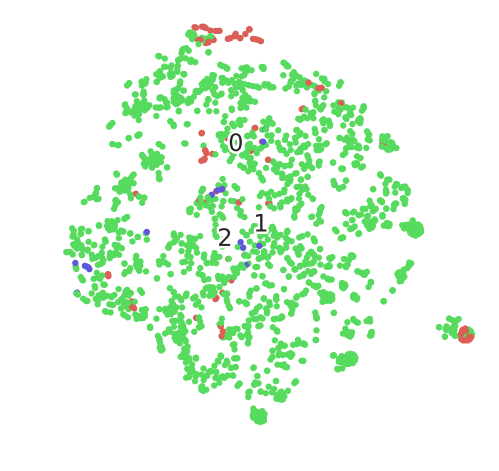

In [66]:
scatter(projection, lab[2000:4000])
plt.savefig('digits_tsne-generated.png', dpi=120)
plt.show()

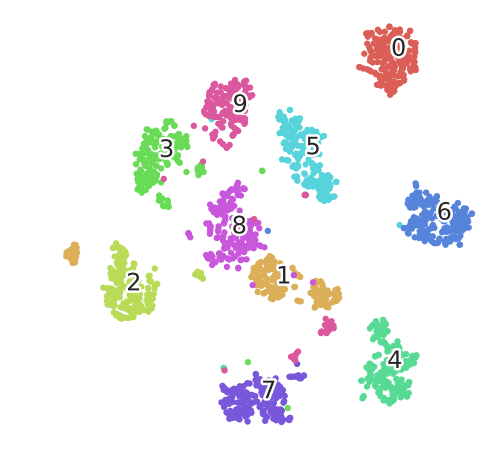

In [39]:
scatter(digits_proj, y)
plt.savefig('digits_tsne-generated.png', dpi=120)
plt.show()

In [29]:
def print_extracted(data, i):
    num = data.shape[1]
    feature = data[i, :5]
    plt.plot(range(num-3), feature)

1


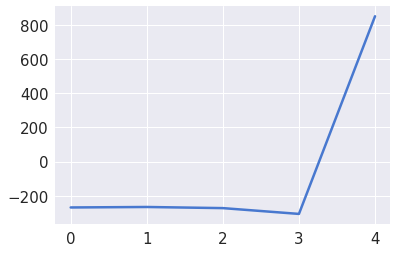

In [30]:
print_extracted(dat, 200)
print(lab[200])

In [31]:
print(dat[200])

[ -268.55559356  -265.73676284  -272.35397303  -306.32767634
   851.23691847  3641.0296974  -1358.9703026  11378.        ]


In [32]:
print(dat[201])

[ -345.5666217   -315.79769993  -337.17731021   820.11135577
 -1915.77738874  3567.63716872 -1432.36283128 10795.        ]
